# **Download Data**


In [1]:
Ü!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-08-29 18:29:42--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.11.208.160, 2600:1407:2800:38c::317f, 2600:1407:2800:391::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.11.208.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   142MB/s    in 5.5s    

2022-08-29 18:29:48 (142 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [2]:
!unzip kagglecatsanddogs_5340.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  i

# **Import Modules**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
warnings.filterwarnings("ignore")

# **Create Dataframe**

In [61]:
input_path=[]
label=[]
for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name=="Cat":
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages", class_name, path))
#print(input_path[0], label[0])

In [76]:
df = pd.DataFrame()
df["images"] = input_path
df["label"] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,images,label
0,PetImages/Dog/4046.jpg,1
1,PetImages/Dog/12011.jpg,1
2,PetImages/Cat/2203.jpg,0
3,PetImages/Cat/3385.jpg,0
4,PetImages/Cat/9827.jpg,0
5,PetImages/Cat/8582.jpg,0
6,PetImages/Cat/1248.jpg,0
7,PetImages/Cat/10918.jpg,0
8,PetImages/Dog/3566.jpg,1
9,PetImages/Cat/11323.jpg,0


In [77]:
for i in df["images"]:
  if ".jpg" not in i:
    print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [78]:
l = []
for image in df["images"]:
  try:
    img = PIL.Image.open(image)
  except:
    l.append(image)
print(l)

['PetImages/Dog/11702.jpg', 'PetImages/Dog/Thumbs.db', 'PetImages/Cat/Thumbs.db', 'PetImages/Cat/666.jpg']


# **Delete Null Files**

In [79]:
df = df[df["images"] != 'PetImages/Dog/Thumbs.db']
df = df[df["images"] != 'PetImages/Dog/11702.jpg']
df = df[df["images"] != 'PetImages/Cat/Thumbs.db']
df = df[df["images"] != 'PetImages/Cat/666.jpg']
print(len(df))

24998


# **Cat and Dog Photos**

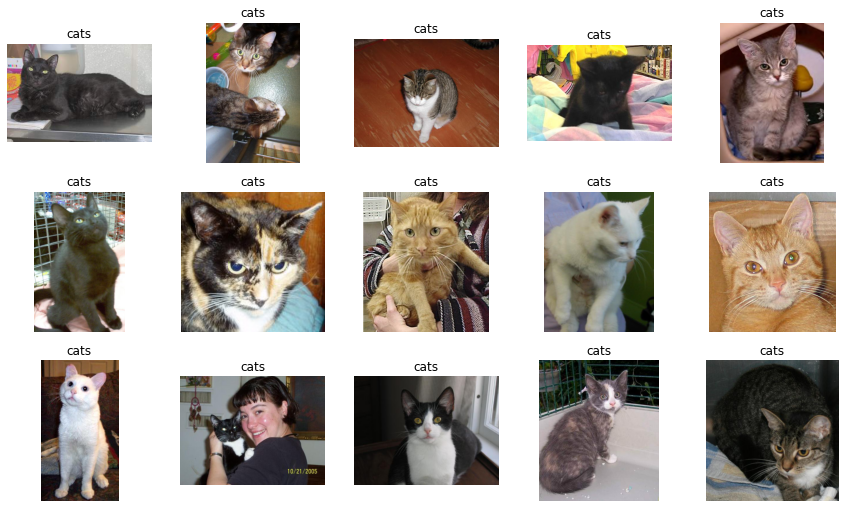

In [80]:
plt.figure(figsize=(15,15))
temp = df[df["label"]==0]["images"]
cat_rand = random.randint(0,len(temp))
files = temp[cat_rand:cat_rand+15]

for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.axis("off")
  plt.title("cats")

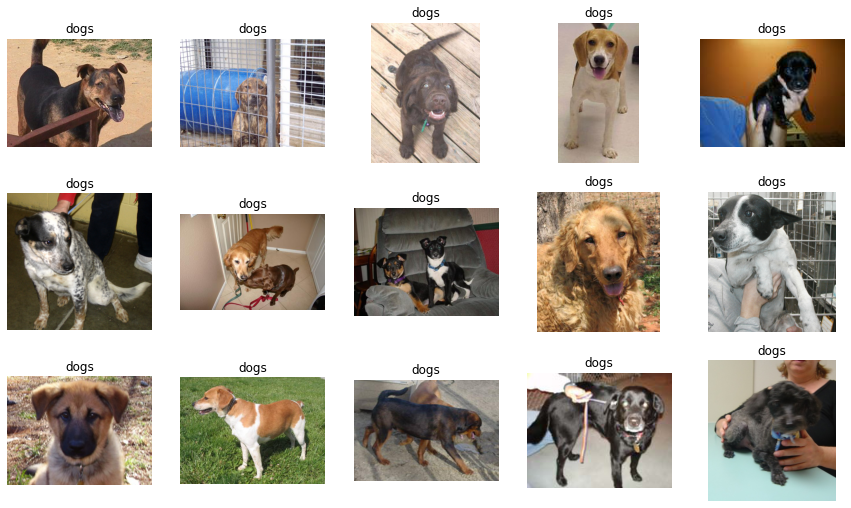

In [81]:
plt.figure(figsize=(15,15))
temp = df[df["label"]==1]["images"]
dog_rand = random.randint(0,len(temp))
files = temp[dog_rand:dog_rand+15]

for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.axis("off")
  plt.title("dogs")

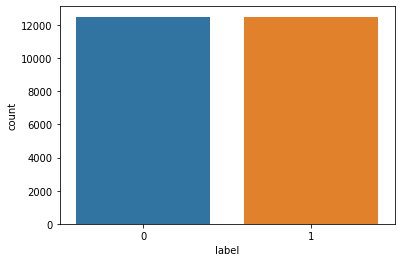

In [82]:
sns.countplot(df["label"]) #0 for cats, 1 for dogs

# **Preprocessing**

In [83]:
df["label"] = df["label"].astype("str")
df.head(10)

,images,label
0,PetImages/Dog/4046.jpg,1
1,PetImages/Dog/12011.jpg,1
2,PetImages/Cat/2203.jpg,0
3,PetImages/Cat/3385.jpg,0
4,PetImages/Cat/9827.jpg,0
5,PetImages/Cat/8582.jpg,0
6,PetImages/Cat/1248.jpg,0
7,PetImages/Cat/10918.jpg,0
8,PetImages/Dog/3566.jpg,1
9,PetImages/Cat/11323.jpg,0


In [84]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [85]:
train_generator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode = "nearest"
)

In [86]:
val_generator = ImageDataGenerator(rescale = 1./255)

In [88]:
train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col="images",
    y_col="label",
    target_size=(128,128),
    batch_size=512,
    class_mode="binary"
)
val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col="images",
    y_col="label",
    target_size=(128,128),
    batch_size=512,
    class_mode="binary"
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [89]:
model = Sequential([
    Conv2D(16,(3,3), activation="relu", input_shape=(128,128,3)),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3),activation="relu"),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512,activation="relu"),
    Dense(1, activation="sigmoid")
])

In [92]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)      

In [93]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 153s 3s/step - loss: 0.7471 - accuracy: 0.5321 - val_loss: 0.6810 - val_accuracy: 0.5546
Epoch 2/10
40/40 [==============================] - 136s 3s/step - loss: 0.6343 - accuracy: 0.6406 - val_loss: 0.5901 - val_accuracy: 0.7030
Epoch 3/10
40/40 [==============================] - 135s 3s/step - loss: 0.5957 - accuracy: 0.6846 - val_loss: 0.5634 - val_accuracy: 0.7114
Epoch 4/10
40/40 [==============================] - 134s 3s/step - loss: 0.5765 - accuracy: 0.6992 - val_loss: 0.5359 - val_accuracy: 0.7320
Epoch 5/10
40/40 [==============================] - 134s 3s/step - loss: 0.5520 - accuracy: 0.7174 - val_loss: 0.5387 - val_accuracy: 0.7214
Epoch 6/10
40/40 [==============================] - 134s 3s/step - loss: 0.5381 - accuracy: 0.7315 - val_loss: 0.5022 - val_accuracy: 0.7496
Epoch 7/10
40/40 [==============================] - 136s 3s/step - loss: 0.5210 - accuracy: 0.7434 - val_loss: 0.4956 - val_accuracy: 0.7522
Epoch 8/10
40

# **Result Visualization**

<Figure size 432x288 with 0 Axes>

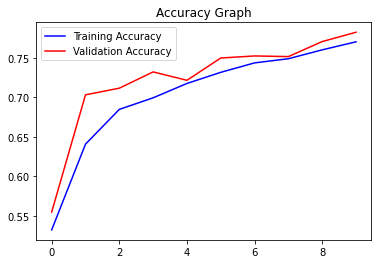

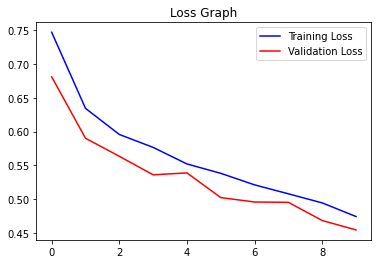

<Figure size 432x288 with 0 Axes>

In [94]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs=range(len(acc))

plt.plot(epochs, acc, "b", label="Training Accuracy")
plt.plot(epochs, val_acc, "r", label="Validation Accuracy")
plt.title("Accuracy Graph")
plt.legend()
plt.figure()

loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "b", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Loss Graph")
plt.legend()
plt.figure()